In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [139]:
SEASONS = ["2017-2018","2018-2019","2019-2020","2020-2021"]

In [140]:
columns = ['index', 'Team', '# Pl', 'Age', 'Poss', 'Gls', 'Ast', 'G-PK', 'PK',
       'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
       'PrgP', 'Gls_Conceded', 'Ast_Conceded', 'G-PK_Conceded', 'PK_Conceded',
       'PKatt_Conceded', 'CrdY_Conceded', 'CrdR_Conceded', 'xG_Conceded',
       'npxG_Conceded', 'xAG_Conceded', 'npxG+xAG_Conceded', 'PrgC_Conceded',
       'PrgP_Conceded', 'season']
df = pd.DataFrame(columns=columns)
for season in SEASONS:
    year_df = pd.read_csv(f"../datasets/raw/unsupervised_learning/teams/fbref.com/team_stats_{season}.csv")
    year_df['season'] = season
    year_df.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
    df = pd.concat([df, year_df])

In [141]:
df

,index,Team,# Pl,Age,Poss,Gls,Ast,G-PK,PK,PKatt,...,PKatt_Conceded,CrdY_Conceded,CrdR_Conceded,xG_Conceded,npxG_Conceded,xAG_Conceded,npxG+xAG_Conceded,PrgC_Conceded,PrgP_Conceded,season
0,0,Arsenal,30,26.8,61.4,73,61,69,4,5,...,6,52,4,47.8,43.1,32.9,75.9,637,1188,2017-2018
1,1,Bournemouth,22,26.9,48.1,45,36,42,3,3,...,3,73,1,59.2,56.8,43.7,100.5,700,1665,2017-2018
2,2,Brighton,24,27.5,43.7,33,25,28,5,7,...,3,30,2,50.8,48.4,34.1,82.5,829,1816,2017-2018
3,3,Burnley,24,27.5,43.7,35,26,35,0,0,...,5,45,6,51.2,47.7,38.0,85.8,866,1572,2017-2018
4,4,Chelsea,26,26.7,55.6,60,42,57,3,3,...,2,75,1,33.8,32.2,24.4,56.7,582,1400,2017-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,15,Southampton,29,26.6,52.0,47,33,42,5,6,...,9,58,3,53.1,46.1,34.6,80.6,555,1407,2020-2021
16,16,Tottenham,24,27.2,51.6,66,50,61,5,5,...,10,77,1,49.1,41.2,31.8,73.1,723,1514,2020-2021
17,17,West Brom,30,26.4,37.9,33,20,29,4,4,...,11,50,1,67.9,59.3,44.1,103.4,931,1802,2020-2021
18,18,West Ham,24,27.8,43.2,60,46,58,2,4,...,5,52,1,48.7,44.8,36.6,81.4,826,1698,2020-2021


In [142]:
df.columns

Index(['index', 'Team', '# Pl', 'Age', 'Poss', 'Gls', 'Ast', 'G-PK', 'PK',
       'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
       'PrgP', 'Gls_Conceded', 'Ast_Conceded', 'G-PK_Conceded', 'PK_Conceded',
       'PKatt_Conceded', 'CrdY_Conceded', 'CrdR_Conceded', 'xG_Conceded',
       'npxG_Conceded', 'xAG_Conceded', 'npxG+xAG_Conceded', 'PrgC_Conceded',
       'PrgP_Conceded', 'season'],
      dtype='object')

In [143]:
# remove unnecessary columns
columns = ['index', 'Team','Poss','Gls','Ast','PrgC','PrgP','Gls_Conceded','Ast_Conceded','PrgC_Conceded','PrgP_Conceded']
df=df[columns]
df

,index,Team,Poss,Gls,Ast,PrgC,PrgP,Gls_Conceded,Ast_Conceded,PrgC_Conceded,PrgP_Conceded
0,0,Arsenal,61.4,73,61,915,2223,51,38,637,1188
1,1,Bournemouth,48.1,45,36,702,1526,60,44,700,1665
2,2,Brighton,43.7,33,25,523,1230,49,36,829,1816
3,3,Burnley,43.7,35,26,431,1103,38,29,866,1572
4,4,Chelsea,55.6,60,42,1045,1998,36,26,582,1400
...,...,...,...,...,...,...,...,...,...,...,...
15,15,Southampton,52.0,47,33,626,1195,67,44,555,1407
16,16,Tottenham,51.6,66,50,633,1330,42,24,723,1514
17,17,West Brom,37.9,33,20,441,1027,73,52,931,1802
18,18,West Ham,43.2,60,46,658,1282,43,34,826,1698


In [157]:
# groupby and calculate average values of 4 seasons.
df = df.groupby('Team').mean()
df.reset_index(inplace=True)
df['index'] = df.index

In [158]:
df

,Team,index,Poss,Gls,Ast,PrgC,PrgP,Gls_Conceded,Ast_Conceded,PrgC_Conceded,PrgP_Conceded
0,Arsenal,0,56.700000,62.75,46.5,839.0,1874.5,46.0,31.25,670.75,1252.75
1,Aston Villa,1,46.300000,46.0,35.0,634.0,1333.5,55.5,37.0,782.0,1686.0
2,Bournemouth,2,46.366667,46.0,34.333333,680.333333,1405.666667,64.0,45.666667,728.0,1670.0
3,Brighton,3,47.350000,35.5,24.25,588.0,1392.75,51.25,36.75,758.5,1572.5
4,Burnley,4,42.225000,37.75,27.0,419.5,1009.25,51.25,39.25,881.0,1625.5
5,Cardiff City,5,35.400000,33.0,20.0,434.0,918.0,69.0,53.0,872.0,1723.0
6,Chelsea,6,59.950000,61.5,44.5,995.25,1962.0,40.25,29.5,511.0,1185.0
7,Crystal Palace,7,43.950000,40.0,27.0,655.0,1280.25,54.75,39.5,751.5,1778.75
8,Everton,8,48.100000,45.5,31.0,600.25,1339.0,50.5,36.75,716.5,1509.25
9,Fulham,9,49.250000,29.5,21.0,677.5,1420.5,65.5,46.5,687.5,1521.5


In [159]:
# standard scaler
from sklearn.preprocessing import StandardScaler

X = np.array(df[['Poss','Gls','Ast','PrgC','PrgP','Gls_Conceded','Ast_Conceded','PrgC_Conceded','PrgP_Conceded']])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[ 1.07883685e+00,  9.69373861e-01,  1.05573639e+00,
         8.76437127e-01,  1.35278565e+00, -6.40162175e-01,
        -7.63065427e-01, -5.17649690e-01, -1.02414703e+00],
       [-3.47981837e-01, -1.78267289e-02,  1.52481788e-01,
        -2.55207942e-01, -2.45963515e-01,  2.30548905e-01,
        -9.50245950e-02,  4.44485259e-01,  6.33249685e-01],
       [-3.38835564e-01, -1.78267289e-02,  1.00119203e-01,
         5.62244614e-04, -3.26984537e-02,  1.00960619e+00,
         9.11877528e-01, -2.25285587e-02,  5.72041728e-01],
       [-2.03928027e-01, -6.36668890e-01, -6.91864902e-01,
        -5.09138054e-01, -7.08694521e-02, -1.58979736e-01,
        -1.24069849e-01,  2.41247764e-01,  1.99055739e-01],
       [-9.07047814e-01, -5.04059855e-01, -4.75869237e-01,
        -1.43929510e+00, -1.20417871e+00, -1.58979736e-01,
         1.66382687e-01,  1.30067726e+00,  4.01807097e-01],
       [-1.84339758e+00, -7.84012261e-01, -1.02567638e+00,
        -1.35925191e+00, -1.47383834e+00,  1.467875

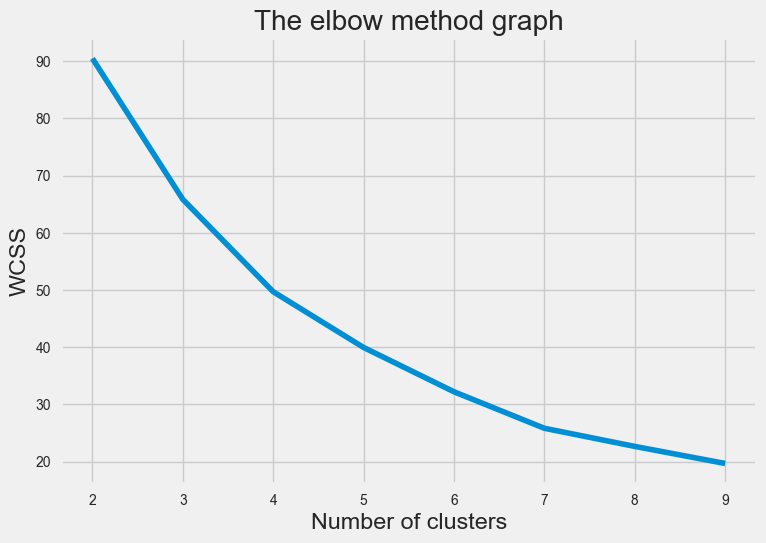

In [160]:

# find out the optimal number of clusters by within-cluster-sum of squared errors
wcss = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_X)
    wcss.append(kmeans.inertia_)

plt.style.use("fivethirtyeight") 
plt.plot(range(2,10), wcss)
plt.title(f'The elbow method graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
# It looks like having 4 is reasonable

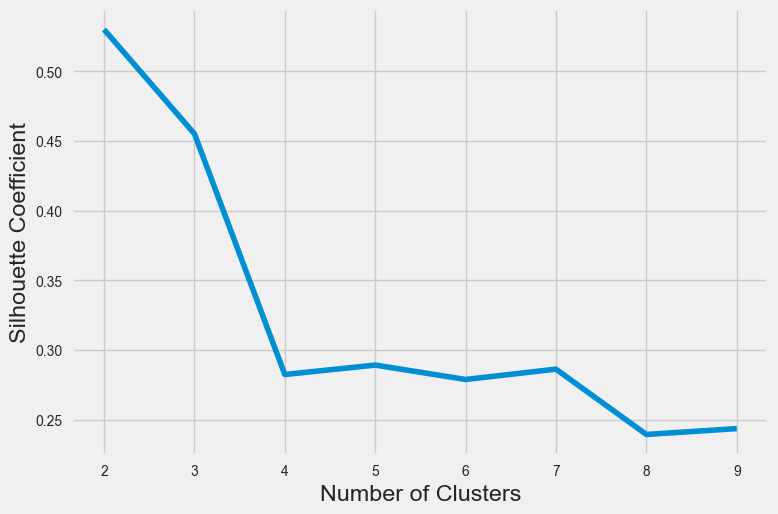

In [161]:
# To get silhouette_score
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_X)
    score = silhouette_score(scaled_X, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
# By silhouette score, 2 or 3 is the optimal number of clusters. But it doens not seem to be the optimal number since it is too small.

/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

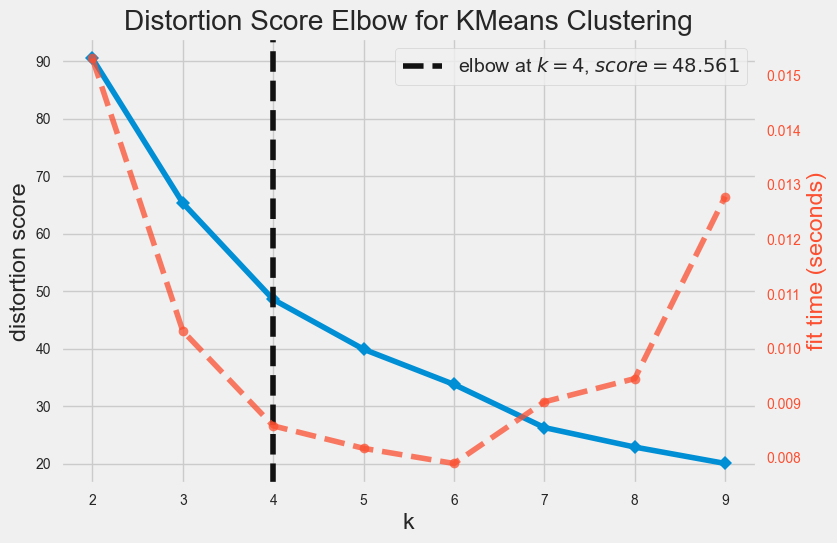

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [165]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10), timings=True)
visualizer.fit(scaled_X)
visualizer.show()

/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

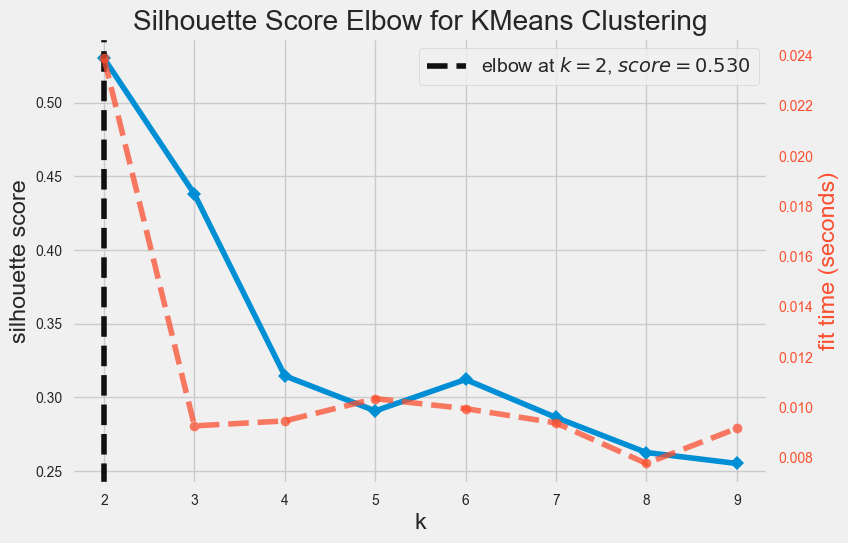

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [166]:
visualizer = KElbowVisualizer(kmeans, k=(2,10), metric='silhouette', timing=True)
visualizer.fit(scaled_X)
visualizer.show()

/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

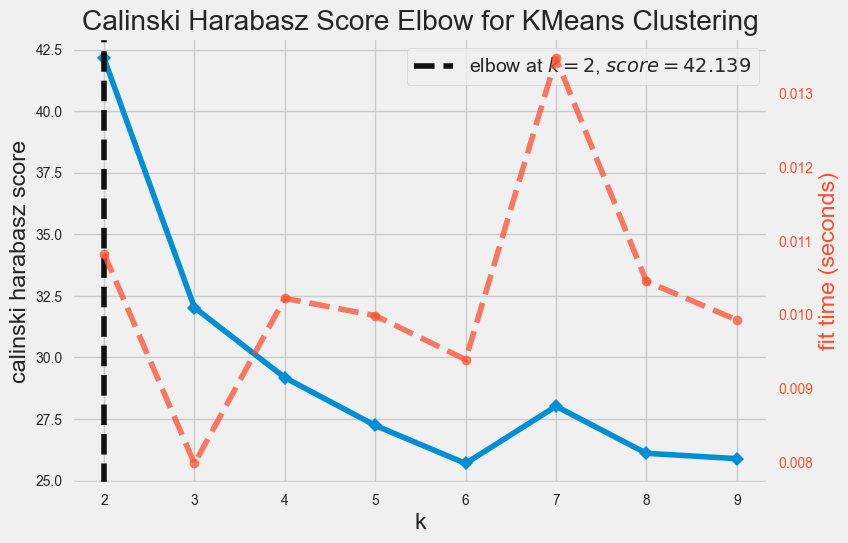

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [167]:
visualizer = KElbowVisualizer(kmeans, k=(2,10), metric='calinski_harabasz', timing=True)
visualizer.fit(scaled_X)
visualizer.show()

In [168]:
### visualize silhouette score
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    n_cols = len(cluster_lists)

    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

 
    for ind, n_cluster in enumerate(cluster_lists):

        clusterer = KMeans(n_clusters=n_cluster, **kmeans_kwargs)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

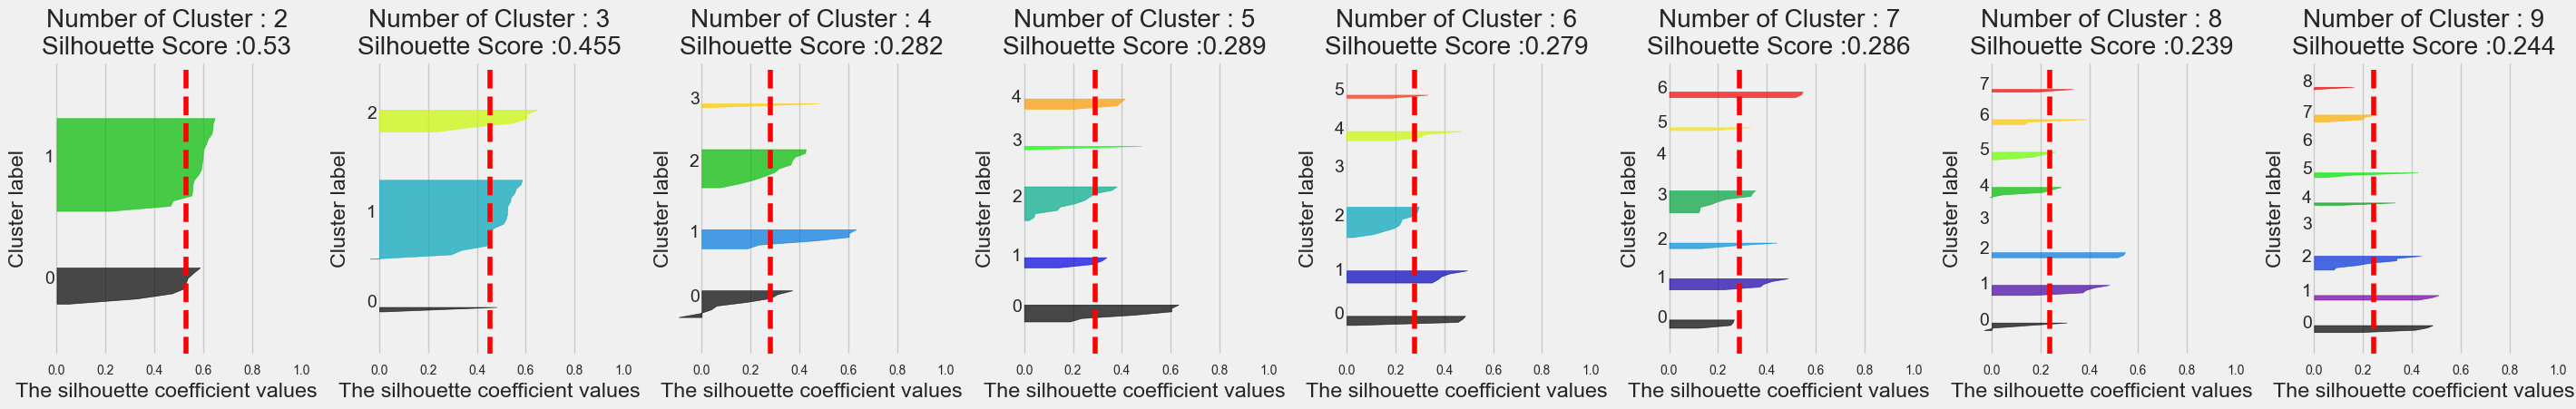

In [169]:
visualize_silhouette(range(2,10), scaled_X)

In [ ]:
# Except 2 and 3, 5 is the best one.

In [170]:
OPTIMAL_N_CLUSTERS = 5

kmeans = KMeans(n_clusters=OPTIMAL_N_CLUSTERS, init='k-means++', max_iter=300, n_init=10, random_state=42)

df['cluster'] = kmeans.fit_predict(scaled_X)



In [171]:
# PCA to visualize
from sklearn.decomposition import PCA 
pca_teams = PCA(n_components=2)
principalComponents_teams = pca_teams.fit_transform(scaled_X)

pca_df = pd.DataFrame(data = principalComponents_teams, columns = ['PCA 1', 'PCA 2'])
pca_df.reset_index(inplace=True)


In [172]:
final_df = pd.merge(df, pca_df, on='index')

In [173]:
# visualize using altair
import altair as alt

alt.Chart(final_df).mark_circle(size=60).encode(
    x='PCA 1',
    y='PCA 2',
    color='cluster:N',
    tooltip=['Team', 'cluster', 'Gls', 'Gls_Conceded',  'Poss', 'PCA 1', 'PCA 2']
).interactive()

alt.Chart(...)

In [176]:
# export csv file
final_df.to_csv(f'../datasets/labeled_after_clustering/kmeans/team_stats_with_label_2017-2020_merged.csv')